In [2]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch
import torch.nn.functional as f

# dataset = 'MNIST'
dataset = 'FMNIST'
# dataset = 'CIFAR10'

if dataset == 'MNIST':
    label_li = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    base_transform = transforms.Compose([transforms.ToTensor()])
    train_set = torchvision.datasets.MNIST(root=f'./{dataset}_DATASET', train=True, download=False, transform=base_transform)
    print(list(train_set.data.size()))
    train_mean = train_set.data.float().mean()/255
    train_std = train_set.data.float().std()/255
    print(train_mean, train_std)

    base_transform = transforms.Compose([transforms.ToTensor()])
    test_set = torchvision.datasets.MNIST(root=f'./{dataset}_DATASET', train=False, download=False, transform=base_transform)
    print(list(test_set.data.size()))
    test_mean = test_set.data.float().mean()/255
    test_std = test_set.data.float().std()/255
    print(test_mean, test_std)

elif dataset == 'FMNIST':
    label_li = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
                  'Ankel boot']
    base_transform = transforms.Compose([transforms.ToTensor()])
    train_set = torchvision.datasets.FashionMNIST(root=f'./{dataset}_DATASET', train=True, download=True, transform=base_transform)
    print(list(train_set.data.size()))
    train_mean = train_set.data.float().mean()/255
    train_std = train_set.data.float().std()/255
    print(train_mean, train_std)

    base_transform = transforms.Compose([transforms.ToTensor()])
    test_set = torchvision.datasets.FashionMNIST(root=f'./{dataset}_DATASET', train=False, download=False, transform=base_transform)
    print(list(test_set.data.size()))
    test_mean = test_set.data.float().mean()/255
    test_std = test_set.data.float().std()/255
    print(test_mean, test_std)
    
elif dataset == 'CIFAR10':
    label_li = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    base_transform = transforms.Compose([transforms.ToTensor()])
    train_set = torchvision.datasets.CIFAR10(root=f'./{dataset}_DATASET', train=True, download=False, transform=base_transform)
    train_set.data = torch.from_numpy(train_set.data)
    print(list(train_set.data.size()))
    train_mean = train_set.data.float().mean()/255
    train_std = train_set.data.float().std()/255
    print(train_mean, train_std)

    base_transform = transforms.Compose([transforms.ToTensor()])
    test_set = torchvision.datasets.CIFAR10(root=f'./{dataset}_DATASET', train=False, download=False, transform=base_transform)
    test_set.data = torch.from_numpy(test_set.data)
    print(list(test_set.data.size()))
    test_mean = test_set.data.float().mean()/255
    test_std = test_set.data.float().std()/255
    print(test_mean, test_std)

100%|██████████| 26421880/26421880 [00:21<00:00, 1244771.74it/s]


Extracting ./FMNIST_DATASET/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FMNIST_DATASET/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 133119.50it/s]


Extracting ./FMNIST_DATASET/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FMNIST_DATASET/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 858235.95it/s] 


Extracting ./FMNIST_DATASET/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FMNIST_DATASET/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8343229.13it/s]


Extracting ./FMNIST_DATASET/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FMNIST_DATASET/FashionMNIST/raw

[60000, 28, 28]
tensor(0.2860) tensor(0.3530)
[10000, 28, 28]
tensor(0.2868) tensor(0.3524)


In [3]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((train_mean,), (train_std,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((test_mean,), (test_std,))
])

In [4]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10

if dataset == 'MNIST':
    download_root = f'./{dataset}_DATASET'
    train_dataset = MNIST(download_root, transform=train_transform, train=True, download=False)
    test_dataset = MNIST(download_root, transform=test_transform, train=False, download=False)

elif dataset == 'FMNIST':
    download_root = f'./{dataset}_DATASET'
    train_dataset = FashionMNIST(download_root, transform=train_transform, train=True, download=False)
    test_dataset = FashionMNIST(download_root, transform=test_transform, train=False, download=False)

elif dataset == 'CIFAR10':
    download_root = f'./{dataset}_DATASET'
    train_dataset = CIFAR10(download_root, transform=train_transform, train=True, download=False)
    test_dataset = CIFAR10(download_root, transform=test_transform, train=False, download=False)
    train_dataset.data = torch.from_numpy(train_dataset.data).permute(0, 3, 1, 2)
    train_dataset.targets = torch.from_numpy(np.array(train_dataset.targets))
    test_dataset.data = torch.from_numpy(test_dataset.data).permute(0, 3, 1, 2)
    test_dataset.targets = torch.from_numpy(np.array(test_dataset.targets))

In [5]:
print(len(train_dataset))

60000


In [6]:
print(train_dataset.data.size())
print(train_dataset.targets.size())
print(train_dataset.targets)

torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([9, 0, 0,  ..., 3, 0, 5])


In [7]:
print(test_dataset.data.size())
print(test_dataset.targets.size())
print(test_dataset.targets)

torch.Size([10000, 28, 28])
torch.Size([10000])
tensor([9, 2, 1,  ..., 8, 1, 5])


In [8]:
x_train = train_dataset.data
y_train = train_dataset.targets

In [9]:
x_train_0 = x_train[y_train == 0]
y_train_0 = y_train[y_train == 0]

x_train_1 = x_train[y_train == 1]
y_train_1 = y_train[y_train == 1]

x_train_2 = x_train[y_train == 2]
y_train_2 = y_train[y_train == 2]

x_train_3 = x_train[y_train == 3]
y_train_3 = y_train[y_train == 3]

x_train_4 = x_train[y_train == 4]
y_train_4 = y_train[y_train == 4]

x_train_5 = x_train[y_train == 5]
y_train_5 = y_train[y_train == 5]

x_train_6 = x_train[y_train == 6]
y_train_6 = y_train[y_train == 6]

x_train_7 = x_train[y_train == 7]
y_train_7 = y_train[y_train == 7]

x_train_8 = x_train[y_train == 8]
y_train_8 = y_train[y_train == 8]

x_train_9 = x_train[y_train == 9]
y_train_9 = y_train[y_train == 9]

In [10]:
if dataset == 'MNIST':
    x_train_0 = x_train_0[:5000]
    y_train_0 = y_train_0[:5000]
    
    x_train_1 = x_train_1[:5000]
    y_train_1 = y_train_1[:5000]
    
    x_train_2 = x_train_2[:5000]
    y_train_2 = y_train_2[:5000]
    
    x_train_3 = x_train_3[:5000]
    y_train_3 = y_train_3[:5000]
    
    x_train_4 = x_train_4[:5000]
    y_train_4 = y_train_4[:5000]
    
    x_train_5 = x_train_5[:5000]
    y_train_5 = y_train_5[:5000]
    
    x_train_6 = x_train_6[:5000]
    y_train_6 = y_train_6[:5000]
    
    x_train_7 = x_train_7[:5000]
    y_train_7 = y_train_7[:5000]
    
    x_train_8 = x_train_8[:5000]
    y_train_8 = y_train_8[:5000]
    
    x_train_9 = x_train_9[:5000]
    y_train_9 = y_train_9[:5000]
    
if dataset == 'CIFAR10':
    x_train_0 = x_train_0[:1000]
    y_train_0 = y_train_0[:1000]
    
    x_train_1 = x_train_1[:1000]
    y_train_1 = y_train_1[:1000]
    
    x_train_2 = x_train_2[:1000]
    y_train_2 = y_train_2[:1000]
    
    x_train_3 = x_train_3[:1000]
    y_train_3 = y_train_3[:1000]
    
    x_train_4 = x_train_4[:1000]
    y_train_4 = y_train_4[:1000]
    
    x_train_5 = x_train_5[:1000]
    y_train_5 = y_train_5[:1000]
    
    x_train_6 = x_train_6[:1000]
    y_train_6 = y_train_6[:1000]
    
    x_train_7 = x_train_7[:1000]
    y_train_7 = y_train_7[:1000]
    
    x_train_8 = x_train_8[:1000]
    y_train_8 = y_train_8[:1000]
    
    x_train_9 = x_train_9[:1000]
    y_train_9 = y_train_9[:1000]

In [11]:
print(len(x_train_0))
print(len(y_train_0))
print(y_train_0)

print(len(x_train_1))
print(len(y_train_1))
print(y_train_1)

print(len(x_train_2))
print(len(y_train_2))
print(y_train_2)

print(len(x_train_3))
print(len(y_train_3))
print(y_train_3)

print(len(x_train_4))
print(len(y_train_4))
print(y_train_4)

print(len(x_train_5))
print(len(y_train_5))
print(y_train_5)

print(len(x_train_6))
print(len(y_train_6))
print(y_train_6)

print(len(x_train_7))
print(len(y_train_7))
print(y_train_7)

print(len(x_train_8))
print(len(y_train_8))
print(y_train_8)

print(len(x_train_9))
print(len(y_train_9))
print(y_train_9)

6000
6000
tensor([0, 0, 0,  ..., 0, 0, 0])
6000
6000
tensor([1, 1, 1,  ..., 1, 1, 1])
6000
6000
tensor([2, 2, 2,  ..., 2, 2, 2])
6000
6000
tensor([3, 3, 3,  ..., 3, 3, 3])
6000
6000
tensor([4, 4, 4,  ..., 4, 4, 4])
6000
6000
tensor([5, 5, 5,  ..., 5, 5, 5])
6000
6000
tensor([6, 6, 6,  ..., 6, 6, 6])
6000
6000
tensor([7, 7, 7,  ..., 7, 7, 7])
6000
6000
tensor([8, 8, 8,  ..., 8, 8, 8])
6000
6000
tensor([9, 9, 9,  ..., 9, 9, 9])


In [12]:
x_test = test_dataset.data
y_test = test_dataset.targets

In [13]:
x_test_0 = x_test[y_test == 0]
y_test_0 = y_test[y_test == 0]

x_test_1 = x_test[y_test == 1]
y_test_1 = y_test[y_test == 1]

x_test_2 = x_test[y_test == 2]
y_test_2 = y_test[y_test == 2]

x_test_3 = x_test[y_test == 3]
y_test_3 = y_test[y_test == 3]

x_test_4 = x_test[y_test == 4]
y_test_4 = y_test[y_test == 4]

x_test_5 = x_test[y_test == 5]
y_test_5 = y_test[y_test == 5]

x_test_6 = x_test[y_test == 6]
y_test_6 = y_test[y_test == 6]

x_test_7 = x_test[y_test == 7]
y_test_7 = y_test[y_test == 7]

x_test_8 = x_test[y_test == 8]
y_test_8 = y_test[y_test == 8]

x_test_9 = x_test[y_test == 9]
y_test_9 = y_test[y_test == 9]

In [14]:
print(len(x_test_0))
print(len(y_test_0))
print(y_test_0)

print(len(x_test_1))
print(len(y_test_1))
print(y_test_1)

print(len(x_test_2))
print(len(y_test_2))
print(y_test_2)

print(len(x_test_3))
print(len(y_test_3))
print(y_test_3)

print(len(x_test_4))
print(len(y_test_4))
print(y_test_4)

print(len(x_test_5))
print(len(y_test_5))
print(y_test_5)

print(len(x_test_6))
print(len(y_test_6))
print(y_test_6)

print(len(x_test_7))
print(len(y_test_7))
print(y_test_7)

print(len(x_test_8))
print(len(y_test_8))
print(y_test_8)

print(len(x_test_9))
print(len(y_test_9))
print(y_test_9)

1000
1000
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

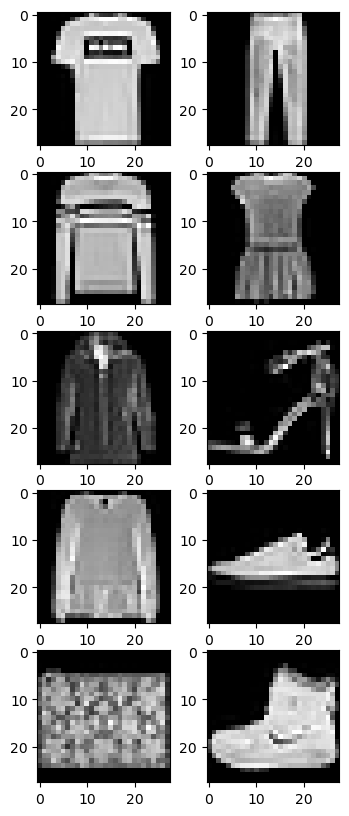

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 10))

plt.subplot(5,2,1)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_0[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_0[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))

    
plt.subplot(5,2,2)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_1[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_1[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))

    
plt.subplot(5,2,3)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_2[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_2[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))

    
plt.subplot(5,2,4)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_3[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_3[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,5)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_4[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_4[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,6)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_5[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_5[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,7)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_6[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_6[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,8)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_7[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_7[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,9)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_8[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_8[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))


plt.subplot(5,2,10)
if dataset in ['MNIST', 'FMNIST']:
    plt.imshow(x_train_9[0], cmap=plt.get_cmap('gray'))
else:
    plt.imshow(x_train_9[0].permute(1, 2, 0), cmap=plt.get_cmap('gray'))

plt.show()

In [16]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

cuda = True if torch.cuda.is_available() else False

if cuda:
    device = 'cuda:6'

In [17]:
all_train_data = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]
all_train_label = [y_train_0, y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9]

all_test_data = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]
all_test_label = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6, y_test_7, y_test_8, y_test_9]

In [18]:
import EarlyStopping
from model import NormalNN, NNClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from torchvision import models
import torch
import torch.nn as nn
from torch import optim
from torchinfo import summary
# from resnet import ResNet18
import random
from model import NormalNN, NNClassifier_CL
import copy

## Joint Training

In [19]:
# import EarlyStopping
# from model import NormalNN, NNClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix
# from torchvision import models
# import torch
# import torch.nn as nn
# from torch import optim
# from torchinfo import summary
# from resnet import ResNet18
# import random

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3
    
# batch_size = 64
# n_class = 10

# # all_upper_bound = []
# all_overall_acc = []
# all_overall_fair = []

# for s in range(5):
    
#     random.seed(s)
#     np.random.seed(s)
#     torch.manual_seed(s)
#     torch.cuda.manual_seed_all(s)
    
#     upper_bound = []

#     seq_acc = {k: [] for k in range(n_class)}
#     overall_acc = []
#     overall_fair = []

#     for i in range(5):
        
#         upper_acc = []

#         print('Task: ', i)

#         x_train_batch = torch.cat(all_train_data[:i*2+2])
#         y_train_batch = torch.cat(all_train_label[:i*2+2])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)
        
#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         if dataset in ['MNIST', 'FMNIST']:
#             model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#         else:
#             model = ResNet18(num_classes=n_class, seed=s)
#         model = model.to(device)
        
#         optimizer_config = {"lr": 0.001}
#         clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)

#         clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')

#         all_test_acc = []

#         for j in range(n_class):
#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
                
#                 upper_acc.append(test_acc)
#                 all_test_acc.append(test_acc)
#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)

        
#         upper_bound.append(upper_acc)
        
#         print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
#         overall_acc.append(np.mean(all_test_acc))
#         overall_fair.append(np.std(all_test_acc))
#         print('\n')

#     print('sequential acc: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label='Class '+str(i*2))
#         plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#         plt.xlabel("Task")
#         plt.ylabel("Accuracy")
#     plt.show()

#     print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
#     print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))
    
#     all_overall_acc.append(np.mean(overall_acc))
#     all_overall_fair.append(np.mean(overall_fair))

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1,2,1)
#     plt.plot(overall_acc)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Accuracy")
    
#     plt.subplot(1,2,2)
#     plt.plot(overall_fair)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Fairness")
#     plt.show()
    
#     print('-------------------------------------------------------------------------------------------------')
    
# #     print('upper bound:', upper_bound)
# #     all_upper_bound.append(upper_bound)
# #     print('\n')
    
# # print('all upper bound:', all_upper_bound)
# print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
# print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))

## Fine Tuning

In [20]:
# batch_size = 64
# n_class = 10

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3
    
# all_overall_acc = []
# all_overall_fair = []

# for s in range(5):
    
#     random.seed(s)
#     np.random.seed(s)
#     torch.manual_seed(s)
#     torch.cuda.manual_seed_all(s)

#     if dataset in ['MNIST', 'FMNIST']:
#         model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#     else:
#         model = ResNet18(num_classes=n_class, seed=s)
#     model = model.to(device)

#     seq_acc = {k: [] for k in range(n_class)}
#     overall_acc = []
#     overall_fair = []

#     for i in range(5):

#         print('Task: ', i)

#         x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#         y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)
        
#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         optimizer_config = {"lr": 0.001}
#         clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)

#         clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')

#         all_test_acc = []

#         for j in range(n_class):

#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)

#                 all_test_acc.append(test_acc)
#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)    
            
#         print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
#         overall_acc.append(np.mean(all_test_acc))
#         overall_fair.append(np.std(all_test_acc))
#         print('\n')

#     print('sequential acc: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label='Class '+str(i*2))
#         plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#         plt.xlabel("Task")
#         plt.ylabel("Accuracy")
#     plt.show()

#     print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
#     print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))
    
#     all_overall_acc.append(np.mean(overall_acc))
#     all_overall_fair.append(np.mean(overall_fair))

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1,2,1)
#     plt.plot(overall_acc)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Accuracy")
    
#     plt.subplot(1,2,2)
#     plt.plot(overall_fair)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Fairness")
#     plt.show()
    
#     print('-------------------------------------------------------------------------------------------------')
    
# #     upper_bound = all_upper_bound[s]
    
# #     print('upper bound:', upper_bound)
# #     print('lower bound:', lower_bound)
    
# #     forget_result = []
    
# #     for ind in range(len(upper_bound)):
# #         list1 = upper_bound[ind]
# #         list2 = lower_bound[ind]
# #         result = list(map(lambda a, b: round(a - b, 3), list1, list2))
# #         forget_result.append(result)
        
# #     print('forget result:', forget_result)
    
# #     forget_summary = []
    
# #     for ind in range(len(forget_result)):
# #         avg_std = []
# #         avg_std.append(round(np.mean(forget_result[ind]), 3))
# #         avg_std.append(round(np.std(forget_result[ind]), 3))
# #         forget_summary.append(avg_std)
        
# #     print('forget summary:', forget_summary)
# #     print('metric1:', round(np.mean(np.array(forget_summary)[:,0]), 3), 'metric2:', round(np.mean(np.array(forget_summary)[:,1]), 3))
# #     print('\n')
    
# #     print('\n')
# print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
# print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))

## Random Buffer (curr = all, buffer size/class = 32)

In [21]:
# batch_size = 64
# buffer_size = 32
# n_class = 10

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3
    
# all_overall_acc = []
# all_overall_fair = []

# for s in range(5):
    
#     random.seed(s)
#     np.random.seed(s)
#     torch.manual_seed(s)
#     torch.cuda.manual_seed_all(s)
    
#     if dataset in ['MNIST', 'FMNIST']:
#         model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#     else:
#         model = ResNet18(num_classes=n_class, seed=s)
#     model = model.to(device)

#     seq_acc = {k: [] for k in range(n_class)}
#     overall_acc = []
#     overall_fair = []

#     for i in range(5):

#         print('Task: ', i)

#         if i == 0:
#             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#         elif i > 0:
#             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])
#             if i == 1:
#                 x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
#                 x_prev_buffer1 = x_prev_buffer1[indices1]
#                 y_prev_buffer1 = y_prev_buffer1[indices1]

#                 x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
#                 x_prev_buffer2 = x_prev_buffer2[indices2]
#                 y_prev_buffer2 = y_prev_buffer2[indices2]

#                 x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
#                 y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

#             else:
#                 x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
#                 x_new_buffer1 = x_new_buffer1[indices1]
#                 y_new_buffer1 = y_new_buffer1[indices1]

#                 x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
#                 x_new_buffer2 = x_new_buffer2[indices2]
#                 y_new_buffer2 = y_new_buffer2[indices2]

#                 x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
#                 y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

#                 x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
#                 y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])

#             x_train_batch = torch.cat([x_prev_buffer, x_train_batch])
#             y_train_batch = torch.cat([y_prev_buffer, y_train_batch])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)

#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         optimizer_config = {"lr": 0.001}
#         clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)

#         clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')

#         all_test_acc = []

#         for j in range(n_class):

#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
#                 all_test_acc.append(test_acc)
#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)

#         print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
#         overall_acc.append(np.mean(all_test_acc))
#         overall_fair.append(np.std(all_test_acc))
#         print('\n')

#     print('sequential acc: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label='Class '+str(i*2))
#         plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#         plt.xlabel("Task")
#         plt.ylabel("Accuracy")
#     plt.show()

#     print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
#     print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))
    
#     all_overall_acc.append(np.mean(overall_acc))
#     all_overall_fair.append(np.mean(overall_fair))

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1,2,1)
#     plt.plot(overall_acc)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Accuracy")

#     plt.subplot(1,2,2)
#     plt.plot(overall_fair)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Fairness")
#     plt.show()
    
#     print('-------------------------------------------------------------------------------------------------')
    
# print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
# print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))

## Random Buffer (curr/class = 32, buffer size/class = 32)

In [22]:
# batch_size = 64
# buffer_size = 32
# n_class = 10

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3
    
# all_overall_acc = []
# all_overall_fair = []
    
# for s in range(5):
    
#     random.seed(s)
#     np.random.seed(s)
#     torch.manual_seed(s)
#     torch.cuda.manual_seed_all(s)

#     if dataset in ['MNIST', 'FMNIST']:
#         model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#     else:
#         model = ResNet18(num_classes=n_class, seed=s)
#     model = model.to(device)

#     seq_acc = {k: [] for k in range(n_class)}
#     overall_acc = []
#     overall_fair = []

#     for i in range(5):

#         print('batch ind: ', i)

#         if i == 0:
#             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#         elif i > 0:
#             x_train_batch1 = torch.cat(all_train_data[i*2:i*2+1])
#             y_train_batch1 = torch.cat(all_train_label[i*2:i*2+1])
#             indices1 = torch.randperm(len(x_train_batch1))[:buffer_size]

#             x_train_batch2 = torch.cat(all_train_data[i*2+1:i*2+2])
#             y_train_batch2 = torch.cat(all_train_label[i*2+1:i*2+2])
#             indices2 = torch.randperm(len(x_train_batch2))[:buffer_size]

#             x_train_batch = torch.cat([x_train_batch1[indices1], x_train_batch2[indices2]])
#             y_train_batch = torch.cat([y_train_batch1[indices1], y_train_batch2[indices2]])

#             if i == 1:
#                 x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
#                 x_prev_buffer1 = x_prev_buffer1[indices1]
#                 y_prev_buffer1 = y_prev_buffer1[indices1]

#                 x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
#                 x_prev_buffer2 = x_prev_buffer2[indices2]
#                 y_prev_buffer2 = y_prev_buffer2[indices2]

#                 x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
#                 y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

#             else:
#                 x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
#                 x_new_buffer1 = x_new_buffer1[indices1]
#                 y_new_buffer1 = y_new_buffer1[indices1]

#                 x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
#                 x_new_buffer2 = x_new_buffer2[indices2]
#                 y_new_buffer2 = y_new_buffer2[indices2]

#                 x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
#                 y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

#                 x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
#                 y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])

#             x_train_batch = torch.cat([x_prev_buffer, x_train_batch])
#             y_train_batch = torch.cat([y_prev_buffer, y_train_batch])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)

#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         optimizer_config = {"lr": 0.001}
#         clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)

#         clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')

#         all_test_acc = []

#         for j in range(n_class):

#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
#                 all_test_acc.append(test_acc)
#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)

#         print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
#         overall_acc.append(np.mean(all_test_acc))
#         overall_fair.append(np.std(all_test_acc))
#         print('\n')

#     print('sequential: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label='Class '+str(i*2))
#         plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#         plt.xlabel("Task")
#         plt.ylabel("Accuracy")
#     plt.show()

#     print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
#     print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))
    
#     all_overall_acc.append(np.mean(overall_acc))
#     all_overall_fair.append(np.mean(overall_fair))

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1,2,1)
#     plt.plot(overall_acc)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Accuracy")

#     plt.subplot(1,2,2)
#     plt.plot(overall_fair)
#     plt.xticks(range(5))
#     plt.xlabel("Task")
#     plt.ylabel("Fairness")
#     plt.show()
    
#     print('-------------------------------------------------------------------------------------------------')
    
# print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
# print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))

## Random Buffer (curr = all, buffer size/class = 32) - CL training

In [23]:
# from model import NormalNN, NNClassifier_CL

# batch_size = 64
# buffer_size = 32
# n_class = 10

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3

# lamb_li = [0.01, 0.05, 0.1, 1, 10, 50, 100]

# lamb_dict = {l: [] for l in lamb_li}

# for lamb in lamb_li:
    
#     all_overall_acc = []
#     all_overall_fair = []

#     for s in range(5):

#         random.seed(s)
#         np.random.seed(s)
#         torch.manual_seed(s)
#         torch.cuda.manual_seed_all(s)

#         if dataset in ['MNIST', 'FMNIST']:
#             model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#         else:
#             model = ResNet18(num_classes=n_class, seed=s)
#         model = model.to(device)

#         seq_acc = {k: [] for k in range(n_class)}
#         overall_acc = []
#         overall_fair = []

#         for i in range(5):

# #             print('Task: ', i)

#             if i == 0:
#                 x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#                 y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#             elif i > 0:
#                 x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#                 y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#                 if i == 1:
#                     x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                     y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                     indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
#                     x_prev_buffer1 = x_prev_buffer1[indices1]
#                     y_prev_buffer1 = y_prev_buffer1[indices1]

#                     x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                     y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                     indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
#                     x_prev_buffer2 = x_prev_buffer2[indices2]
#                     y_prev_buffer2 = y_prev_buffer2[indices2]

#                     x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
#                     y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

#                 else:
#                     x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                     y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                     indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
#                     x_new_buffer1 = x_new_buffer1[indices1]
#                     y_new_buffer1 = y_new_buffer1[indices1]

#                     x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                     y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                     indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
#                     x_new_buffer2 = x_new_buffer2[indices2]
#                     y_new_buffer2 = y_new_buffer2[indices2]

#                     x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
#                     y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

#                     x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
#                     y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])

#             x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#             y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)

# #             for c in range(i*2+2):
# #                 print(c, y_train_batch.cpu().tolist().count(c))

#             train_ds = TensorDataset(x_train_batch, y_train_batch)
#             train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#             optimizer_config = {"lr": 0.001}

#             if i == 0:
#                 clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
#                 clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')
#             elif i > 0:
# #                 print('len prev buffer:', len(x_prev_buffer))
#                 clf = NNClassifier_CL(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
#                 clf.fit({"train": train_loader, "val": train_loader, "buffer": (x_prev_buffer, y_prev_buffer)}, 
#                         epochs=1, sample_size=64, lamb=lamb, device=device, earlystop_path=f'./ckpt/joint.pt', seed=s)

#             all_test_acc = []

#             for j in range(n_class):

#                 if j < i*2+2:

#                     x_test_batch = all_test_data[j]
#                     y_test_batch = all_test_label[j]

#                     x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                     y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                     test_ds = TensorDataset(x_test_batch, y_test_batch)
#                     test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                     test_output, test_loss = clf.evaluate(test_loader)
#                     test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                     cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                     cf_matrix = {}
#                     for k in range(len(cf_li)):
#                         cf_matrix[label_li[k]] = cf_li[k]

# #                     print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
#                     all_test_acc.append(test_acc)
#                     seq_acc[j].append(test_acc)

#                 else:
#                     seq_acc[j].append(0)

# #             print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
#             overall_acc.append(np.mean(all_test_acc))
#             overall_fair.append(np.std(all_test_acc))
# #             print('\n')

# #         print('sequential acc: ', seq_acc)

# #         plt.figure(figsize=(12, 8))
# #         for i in range(5):
# #             plt.subplot(2,3,i+1)
# #             plt.plot(seq_acc[i*2], label='Class '+str(i*2))
# #             plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
# #             plt.xticks(range(5))
# #             plt.legend(loc='best')
# #             plt.xlabel("Task")
# #             plt.ylabel("Accuracy")
# #         plt.show()

# #         print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
# #         print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))

#         all_overall_acc.append(np.mean(overall_acc))
#         all_overall_fair.append(np.mean(overall_fair))

# #         plt.figure(figsize=(10, 4))
# #         plt.subplot(1,2,1)
# #         plt.plot(overall_acc)
# #         plt.xticks(range(5))
# #         plt.xlabel("Task")
# #         plt.ylabel("Accuracy")

# #         plt.subplot(1,2,2)
# #         plt.plot(overall_fair)
# #         plt.xticks(range(5))
# #         plt.xlabel("Task")
# #         plt.ylabel("Fairness")
# #         plt.show()

# #         print('-------------------------------------------------------------------------------------------------')

# #     print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
# #     print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))
    
#     lamb_dict[lamb].append([np.mean(all_overall_acc), np.mean(all_overall_fair)])
    
#     print(lamb, lamb_dict[lamb])
    
# print('-------------------------------------------------------------------------------------------------')
        
# for k, v in lamb_dict.items():
#     print(k, v)
#     print('\n')

## Gradient-based data selection (curr/class = all, buffer size/class = 32) - CL training

In [24]:
import copy
import random

batch_size = 64
buffer_size = 32
n_class = 10
loss_sample = nn.CrossEntropyLoss(reduction='none')

if dataset in ['MNIST', 'FMNIST']:
    n_feature = 28*28
elif dataset in ['CIFAR10']:
    n_feature = 32*32*3
    
if dataset == 'MNIST':
    alpha_li = [0.05]
    lamb_li = [50]

elif dataset == 'FMNIST':
    alpha_li = [0.05]
    lamb_li = [10]

# alpha_li = [0.05]
# lamb_li = [50]

# alpha_li = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
# lamb_li = [0.01, 0.05, 0.1, 1, 10, 50, 100]

alpha_dict = {a: [] for a in alpha_li}

# print(alpha_dict)

for alpha in alpha_li:
    
    for lamb in lamb_li:

        all_overall_acc = []
        all_overall_fair = []

        for s in range(5):
            
            random.seed(s)
            np.random.seed(s)
            torch.manual_seed(s)
            torch.cuda.manual_seed_all(s)

            if dataset in ['MNIST', 'FMNIST']:
                model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
            else:
                model = ResNet18(num_classes=n_class, seed=s)
            model = model.to(device)

            seq_acc = {k: [] for k in range(n_class)}
            overall_acc = []
            overall_fair = []

            for i in range(5):
                
                torch.cuda.empty_cache()

#                 print('Task: ', i)
                
#                 print('memory1:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)

                if i == 0:
                    x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
                    y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

                elif i > 0:
                    x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
                    y_train_batch = torch.cat(all_train_label[i*2:i*2+2])
                    if i == 1:
                        x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
                        y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
                        indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
                        x_prev_buffer1 = x_prev_buffer1[indices1]
                        y_prev_buffer1 = y_prev_buffer1[indices1]

                        x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
                        y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
                        indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
                        x_prev_buffer2 = x_prev_buffer2[indices2]
                        y_prev_buffer2 = y_prev_buffer2[indices2]

                        x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
                        y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

                    else:
        #                 # select random buffer
        #                 x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
        #                 y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
        #                 indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
        #                 x_new_buffer1 = x_new_buffer1[indices1]
        #                 y_new_buffer1 = y_new_buffer1[indices1]

        #                 x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
        #                 y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
        #                 indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
        #                 x_new_buffer2 = x_new_buffer2[indices2]
        #                 y_new_buffer2 = y_new_buffer2[indices2]

        #                 x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
        #                 y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

                        # select gradient-based herding buffer
                        x_new_buffer = torch.cat(all_train_data[i*2-2:i*2])
                        y_new_buffer = torch.cat(all_train_label[i*2-2:i*2])

                        x_new_buffer = x_new_buffer[select_buffer_indexes]
                        y_new_buffer = y_new_buffer[select_buffer_indexes]

                        x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
                        y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])
                        
#                     print('memory2:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)

                    buffer_losses = []

                    # computation of mean gradients and losses for buffers 
                    for n in range(i*2):
                        buffer_ind = [m for m in range(len(y_prev_buffer)) if y_prev_buffer[m] == n]
                        x_buffer = x_prev_buffer[buffer_ind]
                        y_buffer = y_prev_buffer[buffer_ind]
                        x_buffer = torch.Tensor(x_buffer).to(device, dtype=torch.float32)
                        y_buffer = torch.Tensor(y_buffer).to(device, dtype=torch.int64)

                        if n == 0:
                            model.zero_grad()

                            # mean gradient computation
                            out, emb = model(x_buffer)

                            init_out_buffer = out
                            init_emb_buffer = emb
                            init_y_buffer = y_buffer.view(-1, 1)

                            loss = loss_sample(out, y_buffer).sum()
                            buffer_l0_grads = torch.autograd.grad(loss, out)[0]
                            print(f"{buffer_l0_grads.shape=}")
                            if dataset in ['MNIST', 'FMNIST']:
                                buffer_l0_expand = torch.repeat_interleave(buffer_l0_grads, 256, dim=1)
                            else:
                                buffer_l0_expand = torch.repeat_interleave(buffer_l0_grads, 512, dim=1)
                            print(f"{buffer_l0_expand.shape=}")
                            buffer_l1_grads = buffer_l0_expand * emb.repeat(1, n_class)
                            print(f"{buffer_l0_expand.shape=}")

                            buffer_l0_grads = buffer_l0_grads.mean(dim=0).view(1, -1)
                            buffer_l1_grads = buffer_l1_grads.mean(dim=0).view(1, -1)


                            # mean loss computation
                            buffer_ds = TensorDataset(x_buffer, y_buffer)
                            buffer_loader = DataLoader(dataset=buffer_ds, batch_size=batch_size, shuffle=True)
                            buffer_output, buffer_loss = clf.evaluate(buffer_loader)
                            buffer_losses.append(buffer_loss)

                        else:
                            model.zero_grad()

                            # mean gradient computation
                            out, emb = model(x_buffer)

                            init_out_buffer = torch.cat((init_out_buffer, out), dim=0)
                            init_emb_buffer = torch.cat((init_emb_buffer, emb), dim=0)
                            init_y_buffer = torch.cat((init_y_buffer, y_buffer.view(-1, 1)), dim=0)

                            loss = loss_sample(out, y_buffer).sum()
                            batch_l0_grads = torch.autograd.grad(loss, out)[0]
                            if dataset in ['MNIST', 'FMNIST']:
                                batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
                            else:
                                batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 512, dim=1)

                            batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)

                            batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
                            batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)

                            buffer_l0_grads = torch.cat((buffer_l0_grads, batch_l0_grads), dim=0)
                            buffer_l1_grads = torch.cat((buffer_l1_grads, batch_l1_grads), dim=0)

                            # mean loss computation
                            buffer_ds = TensorDataset(x_buffer, y_buffer)
                            buffer_loader = DataLoader(dataset=buffer_ds, batch_size=batch_size, shuffle=True)
                            buffer_output, buffer_loss = clf.evaluate(buffer_loader)
                            buffer_losses.append(buffer_loss)
                            
#                     print('memory3:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)
            
                    print(f"{batch_l0_grads.shape=}")
                    print(f"{batch_l1_grads.shape=}")
                    print(f"{buffer_l0_grads.shape=}")
                    print(f"{buffer_l1_grads.shape=}")
                    print("out of loop")


                    # initialize individual sample gradients of new data
                    new_l0_grads = torch.empty((0, n_class), device=device, dtype=torch.float32)
                    if dataset in ['MNIST', 'FMNIST']:
                        new_l1_grads = torch.empty((0, n_class*256), device=device, dtype=torch.float32)
                    else:
                        new_l1_grads = torch.empty((0, n_class*512), device=device, dtype=torch.float32)

                    # computation of mean and individual gradients and mean losses for new data 
                    for n in range(2):
                        model.zero_grad()

                        # mean gradient computation
                        x_new_buffer = torch.cat(all_train_data[i*2+n:i*2+n+1])
                        y_new_buffer = torch.cat(all_train_label[i*2+n:i*2+n+1])
                        x_new_buffer = torch.Tensor(x_new_buffer).to(device, dtype=torch.float32)
                        y_new_buffer = torch.Tensor(y_new_buffer).to(device, dtype=torch.int64)
                        
                        new_buffer_ds = TensorDataset(x_new_buffer, y_new_buffer)
                        new_buffer_loader = DataLoader(dataset=new_buffer_ds, batch_size=batch_size, shuffle=False)
                        
                        for batch_idx, batch_data in enumerate(new_buffer_loader):
                            model.zero_grad()
                            if batch_idx == 0:
                                x_batch, y_batch = batch_data

                                out, emb = model(x_batch)

                                init_out_buffer = torch.cat((init_out_buffer, out), dim=0)
                                init_emb_buffer = torch.cat((init_emb_buffer, emb), dim=0)
                                init_y_buffer = torch.cat((init_y_buffer, y_batch.view(-1, 1)), dim=0)

                                loss = loss_sample(out, y_batch).sum()
                                batch_l0_grads = torch.autograd.grad(loss, out)[0]
                                
                                with torch.no_grad():
                                    if dataset in ['MNIST', 'FMNIST']:
                                        batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
                                    else:
                                        batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 512, dim=1)
                                    batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)
                                
                            else:
                                
                                x_batch, y_batch = batch_data

                                out, emb = model(x_batch)

                                init_out_buffer = torch.cat((init_out_buffer, out), dim=0)
                                init_emb_buffer = torch.cat((init_emb_buffer, emb), dim=0)
                                init_y_buffer = torch.cat((init_y_buffer, y_batch.view(-1, 1)), dim=0)

                                loss = loss_sample(out, y_batch).sum()
                                next_batch_l0_grads = torch.autograd.grad(loss, out)[0]
                                
                                with torch.no_grad():
                                    if dataset in ['MNIST', 'FMNIST']:
                                        next_batch_l0_expand = torch.repeat_interleave(next_batch_l0_grads, 256, dim=1)
                                    else:
                                        next_batch_l0_expand = torch.repeat_interleave(next_batch_l0_grads, 512, dim=1)
                                    next_batch_l1_grads = next_batch_l0_expand * emb.repeat(1, n_class)

                                    batch_l0_grads = torch.cat((batch_l0_grads, next_batch_l0_grads), dim=0)
                                    batch_l1_grads = torch.cat((batch_l1_grads, next_batch_l1_grads), dim=0)

                        # individual gradients
                        ind_l0_grads = batch_l0_grads.clone()
                        ind_l1_grads = batch_l1_grads.clone()
                        
                        new_l0_grads = torch.cat((new_l0_grads, ind_l0_grads), dim=0)
                        new_l1_grads = torch.cat((new_l1_grads, ind_l1_grads), dim=0)
                                
                        # mean gradients
                        batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
                        batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)
                        print(f"cur_{buffer_l0_grads.shape=}")
                        print(f"cur_{buffer_l1_grads.shape=}")


                        buffer_l0_grads = torch.cat((buffer_l0_grads, batch_l0_grads), dim=0)
                        buffer_l1_grads = torch.cat((buffer_l1_grads, batch_l1_grads), dim=0)
                        print(f"cur_{buffer_l0_grads.shape=}")
                        print(f"cur_{buffer_l1_grads.shape=}")

                        # mean loss computation
                        buffer_ds = TensorDataset(x_new_buffer, y_new_buffer)
                        buffer_loader = DataLoader(dataset=buffer_ds, batch_size=batch_size, shuffle=True)
                        buffer_output, buffer_loss = clf.evaluate(buffer_loader)
                        buffer_losses.append(buffer_loss)
                        
#                     print('memory4:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)
                        
                    torch.cuda.empty_cache()

                    buffer_grads = torch.cat((buffer_l0_grads, buffer_l1_grads), dim=1)
                    print(f"{buffer_grads.shape=}")
                    print(f"{new_l0_grads.shape=}")
                    print(f"{new_l1_grads.shape=}")
                    

                    buffer_grads = f.normalize(buffer_grads, p=2, dim=1)
#                     print('buffer grads:', buffer_grads.shape)
#                     print('buffer grads norm:', torch.norm(buffer_grads, dim=1))

                    print(f"{buffer_grads.shape=}")
                    print("current end")

#                     # initialize individual sample gradients of new data
#                     new_l0_grads = torch.empty((0, n_class), device=device, dtype=torch.float32)
#                     if dataset in ['MNIST', 'FMNIST']:
#                         new_l1_grads = torch.empty((0, n_class*256), device=device, dtype=torch.float32)
#                     else:
#                         new_l1_grads = torch.empty((0, n_class*512), device=device, dtype=torch.float32)

#                     # compute individual sample gradients of new data
#                     for n in range(2):
#                         model.zero_grad()

#                         # individual sample gradient computation
#                         x_new = all_train_data[i*2+n:i*2+n+1][0]
#                         y_new = all_train_label[i*2+n:i*2+n+1][0]
#                         x_new = torch.Tensor(x_new).to(device, dtype=torch.float32)
#                         y_new = torch.Tensor(y_new).to(device, dtype=torch.int64)
                        
#                         print('len new:', len(x_new))

#                         out, emb = model(x_new)
#                         loss = loss_sample(out, y_new).sum()
#                         batch_l0_grads = torch.autograd.grad(loss, out)[0]
#                         if dataset in ['MNIST', 'FMNIST']:
#                             batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
#                         else:
#                             batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 512, dim=1)
#                         batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)

#                         new_l0_grads = torch.cat((new_l0_grads, batch_l0_grads), dim=0)
#                         new_l1_grads = torch.cat((new_l1_grads, batch_l1_grads), dim=0)
                    
                        
#                     print('memory5:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)
                        
                    torch.cuda.empty_cache()
                    
                    with torch.no_grad():

                        new_grads = torch.cat((new_l0_grads, new_l1_grads), dim=1)
                        print(f"{new_grads.shape=}")
                        new_grads_origin = new_grads.clone()
                        new_grads = f.normalize(new_grads, p=2, dim=1)
#                         print('new grads:', new_grads.shape)
#                         print('new grads norm:', torch.norm(new_grads, dim=1))
#                         print('new grads shape:', new_grads, new_grads.shape)

                        buffer_losses = torch.tensor(buffer_losses).view(1,-1)
                        print(f"{buffer_losses.shape=}")
            #             print('initial loss:', buffer_losses)
            #             print('initial mean, std:', buffer_losses.mean(dim=1).item(), buffer_losses.std(dim=1).item())

                        loss_matrix = buffer_losses.repeat(len(new_grads), 1).to(device)
                        loss_matrix_origin = loss_matrix.clone()
                        forget_matrix = torch.matmul(new_grads, torch.transpose(buffer_grads, 0, 1)).to(device)

                    print(f"{forget_matrix.shape=}")
                    
#                     print('init forget matrix shape:', forget_matrix.shape)
                    
#                     print('init memory:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)

                    accumulate_select_indexes = []
                    accumulate_mean = []
                    accumulate_std = []
                    accumulate_sum = []

                    select_indexes = []
                    non_select_indexes = list(range(len(x_train_batch)))

                    num_class1 = 0
                    num_class2 = 0

                    # current data selection
                    for b in range(len(x_train_batch)):
                        
#                         with torch.no_grad():
                            
                        torch.cuda.empty_cache()
        
#                         print('memoryb:', torch.cuda.memory_allocated(device=device)/1024/1024/1024)

                        loss_matrix = loss_matrix - alpha * forget_matrix
                        loss_mean = torch.mean(loss_matrix, dim=1, keepdim=True)
                        loss_std = torch.std(loss_matrix, dim=1, keepdim=True)

        #                 select_ind = torch.argmin(loss_mean, dim=0)
        #                 select_ind = torch.argmin(loss_std, dim=0)
                        select_ind = torch.argmin(loss_mean + loss_std, dim=0)

                        accumulate_mean.append(copy.deepcopy(loss_mean[select_ind].item()))
                        accumulate_std.append(copy.deepcopy(loss_std[select_ind].item()))
                        accumulate_sum.append(copy.deepcopy(loss_mean[select_ind].item() + loss_std[select_ind].item()))

                        if non_select_indexes[select_ind.item()] < len(x_train_batch)/2:
                            num_class1 += 1
                        else:
                            num_class2 += 1

                        select_indexes.append(non_select_indexes[select_ind.item()])
                        accumulate_select_indexes.append(copy.deepcopy(select_indexes))
                        del non_select_indexes[select_ind.item()]

                        best_buffer_losses = loss_matrix[select_ind].view(1,-1)
                        loss_matrix = best_buffer_losses.repeat(len(new_grads)-1, 1).to(device)

#                         # update buffer grads and corresponding forget matrix
#                         if b == 0:
#                             grads_curr = new_grads[select_ind].clone().view(1, -1)
#                         else:
#                             grads_curr += new_grads[select_ind].clone().view(1,-1)
#         #                     grads_curr += new_grads[select_ind].clone().sum(dim=0)

                        new_grads = torch.cat((new_grads[:select_ind.item()], new_grads[select_ind.item()+1:]))

#                         model.zero_grad()

#                         embDim = 256

#                         out_vec = init_out_buffer - (alpha * grads_curr[0][0:n_class].view(1, -1).expand(init_out_buffer.shape[0], -1))

#                         out_vec = out_vec - (alpha * torch.matmul(init_emb_buffer, grads_curr[0][n_class:].view(n_class, -1).transpose(0, 1)))

#                         loss = loss_sample(out_vec, init_y_buffer.view(-1)).sum()
#                         l0_grads = torch.autograd.grad(loss, out_vec)[0]
#                         l0_expand = torch.repeat_interleave(l0_grads, embDim, dim=1)
#                         l1_grads = l0_expand * init_emb_buffer.repeat(1, n_class)

#                         split_ind = []
#                         for n in range(i*2):
#                             split_ind.append((n+1)*buffer_size)
#                         split_ind.append((i*2)*buffer_size+int(len(x_train_batch)/2))

#                         l0_grads = torch.tensor_split(l0_grads, split_ind, dim=0)
#                         mean_l0_grads = []
#                         for n in range(len(l0_grads)):
#                             mean_l0_grads.append(torch.mean(l0_grads[n], dim=0).view(1, -1))
#                         l0_grads = torch.cat(mean_l0_grads, dim=0)

#                         l1_grads = torch.tensor_split(l1_grads, split_ind, dim=0)
#                         mean_l1_grads = []
#                         for n in range(len(l1_grads)):
#                             mean_l1_grads.append(torch.mean(l1_grads[n], dim=0).view(1, -1))
#                         l1_grads = torch.cat(mean_l1_grads, dim=0)

#                         buffer_grads = torch.cat((l0_grads, l1_grads), dim=1)

#                         with torch.no_grad():
#                             forget_matrix = torch.matmul(new_grads, torch.transpose(buffer_grads, 0, 1)).to(device)
                        
#                         print('forget matrix shape:', forget_matrix.shape)

                        forget_matrix = torch.cat((forget_matrix[:select_ind.item()], forget_matrix[select_ind.item()+1:]))

        #                 if num_class1 == int(len(x_train_batch)/2):
        #                     new_grads = new_grads[[n for n in range(len(forget_matrix)) if non_select_indexes[n] >= len(x_train_batch)/2]]
        #                     forget_matrix = forget_matrix[[n for n in range(len(forget_matrix)) if non_select_indexes[n] >= len(x_train_batch)/2]]
        #                     non_select_indexes = [n for n in non_select_indexes if n >= len(x_train_batch)/2]
        #                     loss_matrix = best_buffer_losses.repeat(len(non_select_indexes), 1).to(device)

        #                 elif num_class2 == int(len(x_train_batch)/2):
        #                     new_grads = new_grads[[n for n in range(len(forget_matrix)) if non_select_indexes[n] < len(x_train_batch)/2]]
        #                     forget_matrix = forget_matrix[[n for n in range(len(forget_matrix)) if non_select_indexes[n] < len(x_train_batch)/2]]
        #                     non_select_indexes = [n for n in non_select_indexes if n < len(x_train_batch)/2]
        #                     loss_matrix = best_buffer_losses.repeat(len(non_select_indexes), 1).to(device)

        #             best_ind = np.argmin(np.array(accumulate_mean))
        #             best_ind = np.argmin(np.array(accumulate_std))
                    best_ind = np.argmin(np.array(accumulate_sum))
                    print(f"{best_ind=}")
                    select_curr_indexes = accumulate_select_indexes[best_ind]
                    print(f"{len(select_curr_indexes)=}")
                    print(f"{len(accumulate_select_indexes)=}")
                    


                    # buffer data selection
                    select_buffer_indexes = []

                    class1_indexes = list(range(0, int(len(x_train_batch)/2)))
                    class2_indexes = list(range(int(len(x_train_batch)/2), len(x_train_batch)))

        #             class1_indexes = [ind for ind in select_curr_indexes if ind < len(x_train_batch)/2]
        #             class2_indexes = [ind for ind in select_curr_indexes if ind >= len(x_train_batch)/2]

                    class1_grad_mean = new_grads_origin[class1_indexes].mean(dim=0).view(1, -1)
                    class2_grad_mean = new_grads_origin[class2_indexes].mean(dim=0).view(1, -1)

                    print(f"{class1_grad_mean.shape=}")
                    print(f"{class2_grad_mean.shape=}")

                    candidate_class1_indexes = list(range(0, int(len(x_train_batch)/2)))
                    class1_buffer_indexes = []
                    for m in range(buffer_size):
                        buffer_ind = torch.argmin(torch.norm(class1_grad_mean.repeat(int(len(new_grads_origin)/2)-m, 1) - (torch.sum(new_grads_origin[class1_buffer_indexes], dim=0).repeat(int(len(new_grads_origin)/2)-m,1) + new_grads_origin[candidate_class1_indexes])/(m+1), dim=1), dim=0)
                        class1_buffer_indexes.append(copy.deepcopy(candidate_class1_indexes[buffer_ind]))
                        del candidate_class1_indexes[buffer_ind]

        #             print('class1 buffer indexes:', class1_buffer_indexes, len(class1_buffer_indexes))

                    candidate_class2_indexes = list(range(int(len(x_train_batch)/2), len(x_train_batch)))
                    class2_buffer_indexes = []
                    for m in range(buffer_size):
                        buffer_ind = torch.argmin(torch.norm(class2_grad_mean.repeat(int(len(new_grads_origin)/2)-m, 1) - (torch.sum(new_grads_origin[class2_buffer_indexes], dim=0).repeat(int(len(new_grads_origin)/2)-m,1) + new_grads_origin[candidate_class2_indexes])/(m+1), dim=1), dim=0)
                        class2_buffer_indexes.append(copy.deepcopy(candidate_class2_indexes[buffer_ind]))
                        del candidate_class2_indexes[buffer_ind]

        #             print('class2 buffer indexes:', class2_buffer_indexes, len(class2_buffer_indexes))

                    for ind in class1_buffer_indexes:
                        select_buffer_indexes.append(ind)

                    for ind in class2_buffer_indexes:
                        select_buffer_indexes.append(ind)

#                     print('buffer data:')
#                     for c in range(i*2+2):
#                         print(c, y_prev_buffer.cpu().tolist().count(c))

                    select_curr_indexes = list(set(select_curr_indexes))

                    # current data selection
                    x_train_batch = x_train_batch[select_curr_indexes]
                    y_train_batch = y_train_batch[select_curr_indexes]

                x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
                y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)

#                 print('current data:')
#                 for c in range(i*2+2):
#                     print(c, y_train_batch.cpu().tolist().count(c))

                train_ds = TensorDataset(x_train_batch, y_train_batch)
                train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

                optimizer_config = {"lr": 0.001}
                
                model.zero_grad()

                # Model training using current data and buffer data
                if i == 0:
                    clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
                    clf.fit({"train": train_loader, "val": train_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')
                elif i > 0:
#                     print('len prev buffer:', len(x_prev_buffer))
                    clf = NNClassifier_CL(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
                    clf.fit({"train": train_loader, "val": train_loader, "buffer": (x_prev_buffer, y_prev_buffer)}, 
                            epochs=1, sample_size=64, lamb=lamb, device=device, earlystop_path=f'./ckpt/joint.pt', seed=s)

                # Model evaluation
                all_test_acc = []
                all_test_loss = []

                for j in range(n_class):

                    if j < i*2+2:

                        x_test_batch = all_test_data[j]
                        y_test_batch = all_test_label[j]

                        x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
                        y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

                        test_ds = TensorDataset(x_test_batch, y_test_batch)
                        test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

                        test_output, test_loss = clf.evaluate(test_loader)
                        test_acc = accuracy_score(test_output['true_y'], test_output['output'])

                        cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

                        cf_matrix = {}
                        for k in range(len(cf_li)):
                            cf_matrix[label_li[k]] = cf_li[k]

#                         print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)

                        all_test_acc.append(test_acc)
                        all_test_loss.append(test_loss)
                        seq_acc[j].append(test_acc)

                    else:
                        seq_acc[j].append(0)

#                 print('overall: acc = %.3f, fair = %.3f' %(np.mean(all_test_acc), np.std(all_test_acc)))
                overall_acc.append(np.mean(all_test_acc))
                overall_fair.append(np.std(all_test_acc))

#                 print('\n')

#             print('sequential acc: ', seq_acc)

#             plt.figure(figsize=(12, 8))
#             for i in range(5):
#                 plt.subplot(2,3,i+1)
#                 plt.plot(seq_acc[i*2], label='Class '+str(i*2))
#                 plt.plot(seq_acc[i*2+1], label='Class '+str(i*2+1))
#                 plt.xticks(range(5))
#                 plt.legend(loc='best')
#                 plt.xlabel("Task")
#                 plt.ylabel("Accuracy")
#             plt.show()

#             print('overall acc: ', overall_acc, 'avg:', np.mean(overall_acc))
#             print('overall fair:', overall_fair, 'avg:', np.mean(overall_fair))

            all_overall_acc.append(np.mean(overall_acc))
            all_overall_fair.append(np.mean(overall_fair))

#             plt.figure(figsize=(10, 4))
#             plt.subplot(1,2,1)
#             plt.plot(overall_acc)
#             plt.xticks(range(5))
#             plt.xlabel("Task")
#             plt.ylabel("Accuracy")

#             plt.subplot(1,2,2)
#             plt.plot(overall_fair)
#             plt.xticks(range(5))
#             plt.xlabel("Task")
#             plt.ylabel("Fairness")
#             plt.show()

#             print('-------------------------------------------------------------------------------------------------')

#         print('all overall acc:', np.mean(all_overall_acc), np.std(all_overall_acc))
#         print('all overall fair:', np.mean(all_overall_fair), np.std(all_overall_fair))
        
        alpha_dict[alpha].append([np.mean(all_overall_acc), np.mean(all_overall_fair)])
        print(alpha)
        
    print('alpha:', alpha, alpha_dict[alpha])
    print('avg:', np.mean([e[0] for e in alpha_dict[alpha]]), np.mean([e[1] for e in alpha_dict[alpha]]))
    print('\n')

print('-------------------------------------------------------------------------------------------------')
        
for k, v in alpha_dict.items():
    print(k, v)
    print('avg:', np.mean([e[0] for e in v]), np.mean([e[1] for e in v]))
    print('\n')

buffer_l0_grads.shape=torch.Size([32, 10])
buffer_l0_expand.shape=torch.Size([32, 2560])
buffer_l0_expand.shape=torch.Size([32, 2560])
batch_l0_grads.shape=torch.Size([1, 10])
batch_l1_grads.shape=torch.Size([1, 2560])
buffer_l0_grads.shape=torch.Size([2, 10])
buffer_l1_grads.shape=torch.Size([2, 2560])
out of loop
cur_buffer_l0_grads.shape=torch.Size([2, 10])
cur_buffer_l1_grads.shape=torch.Size([2, 2560])
cur_buffer_l0_grads.shape=torch.Size([3, 10])
cur_buffer_l1_grads.shape=torch.Size([3, 2560])
cur_buffer_l0_grads.shape=torch.Size([3, 10])
cur_buffer_l1_grads.shape=torch.Size([3, 2560])
cur_buffer_l0_grads.shape=torch.Size([4, 10])
cur_buffer_l1_grads.shape=torch.Size([4, 2560])
buffer_grads.shape=torch.Size([4, 2570])
new_l0_grads.shape=torch.Size([12000, 10])
new_l1_grads.shape=torch.Size([12000, 2560])
buffer_grads.shape=torch.Size([4, 2570])
current end
new_grads.shape=torch.Size([12000, 2570])
buffer_losses.shape=torch.Size([1, 4])
forget_matrix.shape=torch.Size([12000, 4])
b

## A-GEM

In [25]:
# batch_size = 64
# n_class = 10
# s = 0
# buffer_size = 100
# curr_size = 4000
# # curr_size = 500
# perBatch_buffer = True
# perBatch_curr = False

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3

# for s in range(1):
    
#     method_bound = []

#     model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#     model = model.to(device)

#     seq_acc = {k: [] for k in range(n_class)}
#     all_overall_acc = []

#     for i in range(5):
        
#         method_acc = []

#         print('batch ind: ', i)

#         if i == 0:
# #             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
# #             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#             x_train_batch1 = torch.cat(all_train_data[i*2:i*2+1])
#             y_train_batch1 = torch.cat(all_train_label[i*2:i*2+1])
#             indices1 = torch.randperm(len(x_train_batch1))[:curr_size]
            
#             x_train_batch2 = torch.cat(all_train_data[i*2+1:i*2+2])
#             y_train_batch2 = torch.cat(all_train_label[i*2+1:i*2+2])
#             indices2 = torch.randperm(len(x_train_batch2))[:curr_size]
            
#             x_train_batch = torch.cat([x_train_batch1[indices1], x_train_batch2[indices2]])
#             y_train_batch = torch.cat([y_train_batch1[indices1], y_train_batch2[indices2]])

#         elif i > 0:
# #             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
# #             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#             x_train_batch1 = torch.cat(all_train_data[i*2:i*2+1])
#             y_train_batch1 = torch.cat(all_train_label[i*2:i*2+1])
#             indices1 = torch.randperm(len(x_train_batch1))[:curr_size]
            
#             x_train_batch2 = torch.cat(all_train_data[i*2+1:i*2+2])
#             y_train_batch2 = torch.cat(all_train_label[i*2+1:i*2+2])
#             indices2 = torch.randperm(len(x_train_batch2))[:curr_size]
            
#             x_train_batch = torch.cat([x_train_batch1[indices1], x_train_batch2[indices2]])
#             y_train_batch = torch.cat([y_train_batch1[indices1], y_train_batch2[indices2]])

#             if i == 1:
#                 x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
#                 x_prev_buffer1 = x_prev_buffer1[indices1]
#                 y_prev_buffer1 = y_prev_buffer1[indices1]

#                 x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
#                 x_prev_buffer2 = x_prev_buffer2[indices2]
#                 y_prev_buffer2 = y_prev_buffer2[indices2]

#                 x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
#                 y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

#             else:
#                 x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
#                 x_new_buffer1 = x_new_buffer1[indices1]
#                 y_new_buffer1 = y_new_buffer1[indices1]

#                 x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
#                 x_new_buffer2 = x_new_buffer2[indices2]
#                 y_new_buffer2 = y_new_buffer2[indices2]

#                 x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
#                 y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

#                 x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
#                 y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])

# #             # gradient computation
# #             loss_sample = nn.CrossEntropyLoss(reduction='none')

# #             for n in range(i*2):
# #                 x_buffer = x_prev_buffer[n*buffer_size:(n+1)*buffer_size]
# #                 y_buffer = y_prev_buffer[n*buffer_size:(n+1)*buffer_size]
# #                 x_buffer = torch.Tensor(x_buffer).to(device, dtype=torch.float32)
# #                 y_buffer = torch.Tensor(y_buffer).to(device, dtype=torch.int64)

# #                 if n == 0:    
# #                     out, emb = model(x_buffer)
# #                     loss = loss_sample(out, y_buffer).sum()
# #                     buffer_l0_grads = torch.autograd.grad(loss, out)[0]
# #                     buffer_l0_expand = torch.repeat_interleave(buffer_l0_grads, 256, dim=1)
# #                     buffer_l1_grads = buffer_l0_expand * emb.repeat(1, n_class)
                    
# #                     buffer_l0_grads = buffer_l0_grads.mean(dim=0).view(1, -1)
# #                     buffer_l1_grads = buffer_l1_grads.mean(dim=0).view(1, -1)

# #                 else:   
# #                     out, emb = model(x_buffer)
# #                     loss = loss_sample(out, y_buffer).sum()
# #                     batch_l0_grads = torch.autograd.grad(loss, out)[0]
# #                     batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
# #                     batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)
                    
# #                     batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
# #                     batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)

# #                     buffer_l0_grads = torch.cat((buffer_l0_grads, batch_l0_grads), dim=0)
# #                     buffer_l1_grads = torch.cat((buffer_l1_grads, batch_l1_grads), dim=0)

# #             buffer_grads = torch.cat((buffer_l0_grads, buffer_l1_grads), dim=1)

# #             new_l0_grads = torch.empty((0, n_class), device=device, dtype=torch.float32)
# #             new_l1_grads = torch.empty((0, n_class*256), device=device, dtype=torch.float32)

# #             for n in range(2):
# #                 x_new = all_train_data[i*2+n:i*2+n+1][0]
# #                 y_new = all_train_label[i*2+n:i*2+n+1][0]
# #                 x_new = torch.Tensor(x_new).to(device, dtype=torch.float32)
# #                 y_new = torch.Tensor(y_new).to(device, dtype=torch.int64)

# #                 out, emb = model(x_new)
# #                 loss = loss_sample(out, y_new).sum()
# #                 batch_l0_grads = torch.autograd.grad(loss, out)[0]
# #                 batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
# #                 batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)
                
# #                 batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
# #                 batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)

# #                 new_l0_grads = torch.cat((new_l0_grads, batch_l0_grads), dim=0)
# #                 new_l1_grads = torch.cat((new_l1_grads, batch_l1_grads), dim=0)

# #             new_grads = torch.cat((new_l0_grads, new_l1_grads), dim=1)
            
# #             # gradient normalization
# #             for n in range(i*2):
# #                 buffer_grads[n*buffer_size:(n+1)*buffer_size] = f.normalize(buffer_grads[n*buffer_size:(n+1)*buffer_size], p=2, dim=1)
            
# #             for n in range(2):
# #                 new_grads[n*4800:(n+1)*4800] = f.normalize(new_grads[n*4800:(n+1)*4800], p=2, dim=1)
                
# #             avg_buffer_grads = torch.mean(buffer_grads, dim=0)

# #             # embedding computation
# #             buffer_emb = []
# #             new_emb = []

# #             with torch.no_grad():
# #                 for n in range(i*2):
# #                     x_buffer = x_prev_buffer[n*buffer_size:(n+1)*buffer_size]
# #                     x_buffer = torch.Tensor(x_buffer).to(device, dtype=torch.float32)
# #                     _, emb = model(x_buffer)
# #                     emb_avg = torch.mean(emb, dim=0)
# #                     buffer_emb.append(emb_avg)

# #             with torch.no_grad():
# #                 for n in range(2):
# #     #                 x_new = all_train_data[i*2+n:i*2+n+1][0]
# #                     x_new = x_train_batch[n*curr_size:(n+1)*curr_size]
# #     #                 print(len(x_new[0]))
# #                     x_new = torch.Tensor(x_new).to(device, dtype=torch.float32)
# #                     _, emb = model(x_new)
# #                     emb_avg = torch.mean(emb, dim=0)
# #                     new_emb.append(emb_avg)

# #     #         print('buffer emb:', len(buffer_emb))
# #     #         print('new emb:', len(new_emb))
    
# #             all_cos_li = []

# #             for grad1 in new_grads:
# # #                 dist_li = []
# #                 cos_li = []
# #                 for grad2 in buffer_grads:
# #                     cos = torch.dot(grad1, grad2)
# #                     cos_li.append(cos.cpu().detach())
# # #                     dist = torch.linalg.norm(emb1 - emb2, ord=2)
# # #                     dist_li.append(dist.cpu())
# #     #             print(sorted(range(len(dist_li)), key=lambda k: dist_li[k]))
# # #                 all_dist_li.append(dist_li)
# #                 all_cos_li.append(cos_li)

# #             print('all cos li:', all_cos_li)

# #             all_dist_li = []

# #             for emb1 in new_emb:
# #                 dist_li = []
# #                 for emb2 in buffer_emb:
# #                     dist = torch.linalg.norm(emb1 - emb2, ord=2)
# #                     dist_li.append(dist.cpu())
# #     #             print(sorted(range(len(dist_li)), key=lambda k: dist_li[k]))
# #                 all_dist_li.append(dist_li)

# #             print('all dist li:', all_dist_li)

# # #             x_train_batch = torch.cat([x_prev_buffer, x_train_batch])
# # #             y_train_batch = torch.cat([y_prev_buffer, y_train_batch])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)
        
#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#     #     x_valid_batch = torch.cat(all_valid_data[i*2:i*2+2])
#     #     y_valid_batch = torch.cat(all_valid_label[i*2:i*2+2])

#         x_valid_batch = torch.cat(all_valid_data[:i*2+2])
#         y_valid_batch = torch.cat(all_valid_label[:i*2+2])

#         x_valid_batch = torch.Tensor(x_valid_batch).to(device, dtype=torch.float32)
#         y_valid_batch = torch.Tensor(y_valid_batch).to(device, dtype=torch.int64)

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         valid_ds = TensorDataset(x_valid_batch, y_valid_batch)
#         valid_loader = DataLoader(dataset=valid_ds, batch_size=batch_size, shuffle=True)

#         optimizer_config = {"lr": 0.001}
        
#         if i == 0:
#             clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
#             clf.fit({"train": train_loader, "val": valid_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt')
#         elif i > 0:
#             clf = NNClassifier_CL(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)
#             clf.fit({"train": train_loader, "val": valid_loader}, epochs=1, earlystop_path=f'./ckpt/joint.pt', x_prev_buffer=x_prev_buffer, y_prev_buffer=y_prev_buffer, buffer_size=buffer_size, i=i, device=device, n_class=n_class)

#         all_test_acc = []

#         for j in range(n_class):

#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
                
#                 method_acc.append(test_acc)

#                 all_test_acc.append(test_acc)

#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)

#         method_bound.append(method_acc)  
                
#         print('overall: avg acc = %.3f' %(np.mean(all_test_acc)))  
#         all_overall_acc.append(np.mean(all_test_acc))
#         print('\n')

#     print('sequential: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label=str(i*2))
#         plt.plot(seq_acc[i*2+1], label=str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#     plt.show()

#     print('overall result: ', all_overall_acc)
#     print('overall avg: ', np.mean(all_overall_acc))

#     plt.plot(all_overall_acc)
#     plt.xticks(range(5))
#     plt.show()
    
#     upper_bound = all_upper_bound[s]
    
#     print('upper bound:', upper_bound)
#     print('method bound:', method_bound, '\n')
    
#     forget_result = []
    
#     for ind in range(len(upper_bound)):
#         list1 = upper_bound[ind]
#         list2 = method_bound[ind]
#         result = list(map(lambda a, b: round(a - b, 3), list1, list2))
#         forget_result.append(result)
        
#     print('forget result:', forget_result)
    
#     forget_summary = []
    
#     for ind in range(len(forget_result)):
#         avg_std = []
#         avg_std.append(round(np.mean(forget_result[ind]), 3))
#         avg_std.append(round(np.std(forget_result[ind]), 3))
#         forget_summary.append(avg_std)
        
#     print('forget summary:', forget_summary)
#     print('metric1:', round(np.mean(np.array(forget_summary)[:,0]), 3), 'metric2:', round(np.mean(np.array(forget_summary)[:,1]), 3))
#     print('\n')

## grad curr

In [26]:
# batch_size = 64
# n_class = 10
# buffer_size = 100
# curr_size = 100
# perBatch_buffer = True
# perBatch_curr = False

# if dataset in ['MNIST', 'FMNIST']:
#     n_feature = 28*28
# elif dataset in ['CIFAR10']:
#     n_feature = 32*32*3
    
# for s in range(1):
    
#     method_bound = []

#     model = NormalNN(input_features=n_feature, n_class=n_class, seed=s)
#     model = model.to(device)

#     seq_acc = {k: [] for k in range(n_class)}
#     all_overall_acc = []

#     for i in range(5):
        
#         method_acc = []

#         print('batch ind: ', i)
# #         print('past: ', label_li[:i*2])

# #         for p in range(len(label_li[:i*2])):
# #             plt.figure(figsize=(8, 40))
# #             for r in range(5):
# #                 plt.subplot(1,5,r+1)
# #                 if dataset in ['MNIST', 'FMNIST']:
# #                     plt.imshow(torch.cat(all_train_data[p:p+1])[r], cmap=plt.get_cmap('gray'))
# #                 else:
# #                     plt.imshow(torch.cat(all_train_data[p:p+1])[r].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #             plt.show()

# #         print('curr: ', label_li[i*2:i*2+2])

# #         plt.figure(figsize=(8, 40))
# #         for r in range(5):
# #             plt.subplot(1,5,r+1)
# #             if dataset in ['MNIST', 'FMNIST']:
# #                 plt.imshow(torch.cat(all_train_data[i*2:i*2+1])[r], cmap=plt.get_cmap('gray'))
# #             else:
# #                 plt.imshow(torch.cat(all_train_data[i*2:i*2+1])[r].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #         plt.show()

# #         plt.figure(figsize=(8, 40))
# #         for r in range(5):
# #             plt.subplot(1,5,r+1)
# #             if dataset in ['MNIST', 'FMNIST']:
# #                 plt.imshow(torch.cat(all_train_data[i*2+1:i*2+2])[r], cmap=plt.get_cmap('gray'))
# #             else:
# #                 plt.imshow(torch.cat(all_train_data[i*2+1:i*2+2])[r].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #         plt.show()

#         if i == 0:
#             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])

#         elif i > 0:
#             x_train_batch = torch.cat(all_train_data[i*2:i*2+2])
#             y_train_batch = torch.cat(all_train_label[i*2:i*2+2])
#             if i == 1:
#                 x_prev_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_prev_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_prev_buffer1))[:buffer_size]
#                 x_prev_buffer1 = x_prev_buffer1[indices1]
#                 y_prev_buffer1 = y_prev_buffer1[indices1]

#                 x_prev_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_prev_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_prev_buffer2))[:buffer_size]
#                 x_prev_buffer2 = x_prev_buffer2[indices2]
#                 y_prev_buffer2 = y_prev_buffer2[indices2]

#                 x_prev_buffer = torch.cat([x_prev_buffer1, x_prev_buffer2])
#                 y_prev_buffer = torch.cat([y_prev_buffer1, y_prev_buffer2])

#             else:
#                 x_new_buffer1 = torch.cat(all_train_data[i*2-2:i*2-1])
#                 y_new_buffer1 = torch.cat(all_train_label[i*2-2:i*2-1])
#                 indices1 = torch.randperm(len(x_new_buffer1))[:buffer_size]
# #                 indices1 = bot_indices1.cpu()
#                 x_new_buffer1 = x_new_buffer1[indices1]
#                 y_new_buffer1 = y_new_buffer1[indices1]

#                 x_new_buffer2 = torch.cat(all_train_data[i*2-1:i*2])
#                 y_new_buffer2 = torch.cat(all_train_label[i*2-1:i*2])
#                 indices2 = torch.randperm(len(x_new_buffer2))[:buffer_size]
# #                 indices2 = torch.subtract(bot_indices2, 4800).cpu()
#                 x_new_buffer2 = x_new_buffer2[indices2]
#                 y_new_buffer2 = y_new_buffer2[indices2]

#                 x_new_buffer = torch.cat([x_new_buffer1, x_new_buffer2])
#                 y_new_buffer = torch.cat([y_new_buffer1, y_new_buffer2])

#                 x_prev_buffer = torch.cat([x_prev_buffer, x_new_buffer])
#                 y_prev_buffer = torch.cat([y_prev_buffer, y_new_buffer])

#             # gradient computation
#             loss_sample = nn.CrossEntropyLoss(reduction='none')

#             for n in range(i*2):
#                 x_buffer = x_prev_buffer[n*buffer_size:(n+1)*buffer_size]
#                 y_buffer = y_prev_buffer[n*buffer_size:(n+1)*buffer_size]
#                 x_buffer = torch.Tensor(x_buffer).to(device, dtype=torch.float32)
#                 y_buffer = torch.Tensor(y_buffer).to(device, dtype=torch.int64)

#                 if n == 0:    
#                     out, emb = model(x_buffer)
#                     loss = loss_sample(out, y_buffer).sum()
#                     buffer_l0_grads = torch.autograd.grad(loss, out)[0]
#                     buffer_l0_expand = torch.repeat_interleave(buffer_l0_grads, 256, dim=1)
#                     buffer_l1_grads = buffer_l0_expand * emb.repeat(1, n_class)
#                     if perBatch_buffer:
#                         buffer_l0_grads = buffer_l0_grads.mean(dim=0).view(1, -1)
#                         buffer_l1_grads = buffer_l1_grads.mean(dim=0).view(1, -1)

#                 else:   
#                     out, emb = model(x_buffer)
#                     loss = loss_sample(out, y_buffer).sum()
#                     batch_l0_grads = torch.autograd.grad(loss, out)[0]
#                     batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
#                     batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)
#                     if perBatch_buffer:
#                         batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
#                         batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)

#                     buffer_l0_grads = torch.cat((buffer_l0_grads, batch_l0_grads), dim=0)
#                     buffer_l1_grads = torch.cat((buffer_l1_grads, batch_l1_grads), dim=0)

#             buffer_grads = torch.cat((buffer_l0_grads, buffer_l1_grads), dim=1)
# #             buffer_grads_norm = f.normalize(buffer_grads, p=2, dim=1)

#             new_l0_grads = torch.empty((0, n_class), device=device, dtype=torch.float32)
#             new_l1_grads = torch.empty((0, n_class*256), device=device, dtype=torch.float32)

#             for n in range(2):
#                 x_new = all_train_data[i*2+n:i*2+n+1][0]
#                 y_new = all_train_label[i*2+n:i*2+n+1][0]
#                 x_new = torch.Tensor(x_new).to(device, dtype=torch.float32)
#                 y_new = torch.Tensor(y_new).to(device, dtype=torch.int64)

#                 out, emb = model(x_new)
#                 loss = loss_sample(out, y_new).sum()
#                 batch_l0_grads = torch.autograd.grad(loss, out)[0]
#                 batch_l0_expand = torch.repeat_interleave(batch_l0_grads, 256, dim=1)
#                 batch_l1_grads = batch_l0_expand * emb.repeat(1, n_class)
#                 if perBatch_curr:
#                     batch_l0_grads = batch_l0_grads.mean(dim=0).view(1, -1)
#                     batch_l1_grads = batch_l1_grads.mean(dim=0).view(1, -1)

#                 new_l0_grads = torch.cat((new_l0_grads, batch_l0_grads), dim=0)
#                 new_l1_grads = torch.cat((new_l1_grads, batch_l1_grads), dim=0)

#             new_grads = torch.cat((new_l0_grads, new_l1_grads), dim=1)
# #             new_grads_norm = f.normalize(new_grads, p=2, dim=1)
# #             new_grads_norm = new_grads

            
#             # gradient normalization
#             for n in range(i*2):
#                 buffer_grads[n*buffer_size:(n+1)*buffer_size] = f.normalize(buffer_grads[n*buffer_size:(n+1)*buffer_size], p=2, dim=1)
            
#             for n in range(2):
#                 new_grads[n*4800:(n+1)*4800] = f.normalize(new_grads[n*4800:(n+1)*4800], p=2, dim=1)
            

#             # coreset
#             with torch.no_grad():
#                 new_grads_avg1 = new_grads[:4800].mean(dim=0).view(1, -1)
#                 new_grads_avg1_flip = new_grads_avg1.transpose(0,1)
#                 core_score1 = torch.matmul(new_grads[:4800], new_grads_avg1_flip).view(-1)
                
#                 new_grads_avg2 = new_grads[4800:4800*2].mean(dim=0).view(1, -1)
#                 new_grads_avg2_flip = new_grads_avg2.transpose(0,1)
#                 core_score2 = torch.matmul(new_grads[4800:4800*2], new_grads_avg2_flip).view(-1)
                
#             # embedding computation
#             buffer_emb = []
#             new_emb = []

#             with torch.no_grad():
#                 for n in range(i*2):
#                     x_buffer = x_prev_buffer[n*buffer_size:(n+1)*buffer_size]
#                     x_buffer = torch.Tensor(x_buffer).to(device, dtype=torch.float32)
#                     _, emb = model(x_buffer)
#                     if perBatch_buffer:
#                         emb_avg = torch.mean(emb, dim=0)
#                         buffer_emb.append(emb_avg)
#                     else:
#                         buffer_emb.append(emb)

#             with torch.no_grad():
#                 for n in range(2):
#                     x_new = all_train_data[i*2+n:i*2+n+1][0]
#                     x_new = torch.Tensor(x_new).to(device, dtype=torch.float32)
#                     _, emb = model(x_new)
# #                     if perBatch_curr:
#                     emb_avg = torch.mean(emb, dim=0)
#                     new_emb.append(emb_avg)
# #                     else:
# #                         new_emb.extend(emb)

#             print('buffer emb:', len(buffer_emb))
#             print('new emb:', len(new_emb))

#             all_dist_li = []
            
# #             for emb1 in buffer_emb:
# #                 dist_li = []
# #                 for emb2 in buffer_emb:
# #                     dist = torch.linalg.norm(emb1 - emb2, ord=2)
# #                     dist_li.append(dist.cpu())
# #                 all_dist_li.append(dist_li)

#             for emb1 in new_emb:
#                 dist_li = []
#                 for emb2 in buffer_emb:
#                     dist = torch.linalg.norm(emb1 - emb2, ord=2)
#                     dist_li.append(dist.cpu())
#                 all_dist_li.append(dist_li)

#             print('all dist li:', all_dist_li)
# #             print('first:', all_dist_li[0])
# #             print('second:', all_dist_li[1])
            
# #             print(sum(all_dist_li[0]))
            
#             weight1 = torch.div(torch.Tensor([1]*len(all_dist_li[0])), torch.Tensor(all_dist_li[0]))
#             weight1 = torch.div(weight1, sum(weight1)).view(-1, 1).to(device)
#             weight2 = torch.div(torch.Tensor([1]*len(all_dist_li[1])), torch.Tensor(all_dist_li[1]))
#             weight2 = torch.div(weight2, sum(weight2)).view(-1, 1).to(device)
            
#             print('weight1:', weight1, weight1.size())
#             print('weight2:', weight2, weight2.size())
            
#             # grad angle
#             with torch.no_grad():
#                 buffer_grads_flip = buffer_grads.transpose(0,1)
#                 new_grads_1 = new_grads[:4800].mean(dim=0).view(1, -1)
#                 cos_1 = torch.matmul(new_grads_1, buffer_grads_flip)
#                 new_grads_2 = new_grads[4800:4800*2].mean(dim=0).view(1, -1)
#                 cos_2 = torch.matmul(new_grads_2, buffer_grads_flip)
#                 print('cos 1:', cos_1)
#                 print('cos 2:', cos_2)

#             # interference
#             with torch.no_grad():
#                 buffer_grads_flip = buffer_grads.transpose(0,1)
#                 inner_p1 = torch.matmul(new_grads[:4800], buffer_grads_flip)
                
#                 print('inner_p1:', inner_p1.size())

#                 # top k
#                 inters1 = torch.sum(inner_p1, dim=1)
#                 final_score1 = core_score1
# #                 final_score1 = core_score1
#                 top_values1, top_indices1 = final_score1.topk(buffer_size, largest=False)

# #                 plt.figure(figsize=(50, 50))
# #                 for t in range(len(top_indices1)):
# #                     plt.subplot(10,10,t+1)
# #                     if dataset in ['MNIST', 'FMNIST']:
# #                         plt.imshow(x_train_batch[top_indices1[t]], cmap=plt.get_cmap('gray'))
# #                     else:
# #                         plt.imshow(x_train_batch[top_indices1[t]].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #                 plt.show()

#                 # bot k
# #                 inters1 = torch.sum(inner_p1, dim=1)
# #                 inters1 = torch.sum(torch.abs(inner_p1), dim=1)
#                 inters1 = torch.matmul(inner_p1, weight1).view(-1)
# #                 inters1 = torch.matmul(torch.abs(inner_p1), weight1).view(-1)
# #                 final_score1 = -(1/(i*2))*core_score1 + inters1
#                 final_score1 = inters1
#                 bot_values1, bot_indices1 = final_score1.topk(buffer_size, largest=True)

# #                 plt.figure(figsize=(50, 50))
# #                 for t in range(len(bot_indices1)):
# #                     plt.subplot(10,10,t+1)
# #                     if dataset in ['MNIST', 'FMNIST']:
# #                         plt.imshow(x_train_batch[bot_indices1[t]], cmap=plt.get_cmap('gray'))
# #                     else:
# #                         plt.imshow(x_train_batch[bot_indices1[t]].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #                 plt.show()


#                 inner_p2 = torch.matmul(new_grads[4800:4800*2], buffer_grads_flip)

#                 # top k
#                 inters2 = torch.sum(inner_p2, dim=1)
#                 final_score2 = core_score2
# #                 final_score2 = core_score2
#                 top_values2, top_indices2 = final_score2.topk(buffer_size, largest=False)
#                 top_indices2 = torch.add(top_indices2, 4800)

# #                 plt.figure(figsize=(50, 50))
# #                 for t in range(len(top_indices2)):
# #                     plt.subplot(10,10,t+1)
# #                     if dataset in ['MNIST', 'FMNIST']:
# #                         plt.imshow(x_train_batch[top_indices2[t]], cmap=plt.get_cmap('gray'))
# #                     else:
# #                         plt.imshow(x_train_batch[top_indices2[t]].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #                 plt.show()

#                 # bot k
# #                 inters2 = torch.sum(inner_p2, dim=1)
# #                 inters2 = torch.sum(torch.abs(inner_p2), dim=1)
#                 inters2 = torch.matmul(inner_p2, weight2).view(-1)
# #                 inters2 = torch.matmul(torch.abs(inner_p2), weight2).view(-1)
# #                 final_score2 = -(1/(i*2))*core_score2 + inters2
#                 final_score2 = inters2
#                 bot_values2, bot_indices2 = final_score2.topk(buffer_size, largest=True)
#                 bot_indices2 = torch.add(bot_indices2, 4800)

# #                 plt.figure(figsize=(50, 50))
# #                 for t in range(len(bot_indices2)):
# #                     plt.subplot(10,10,t+1)
# #                     if dataset in ['MNIST', 'FMNIST']:
# #                         plt.imshow(x_train_batch[bot_indices2[t]], cmap=plt.get_cmap('gray'))
# #                     else:
# #                         plt.imshow(x_train_batch[bot_indices2[t]].permute(1, 2, 0), cmap=plt.get_cmap('gray'))  
# #                 plt.show()

# #             print('top indices1:', top_indices1)
# #             print('top indices2:', top_indices2)
# #             print('len:', len(x_train_batch))

# #             x_train_batch = torch.cat((x_train_batch[top_indices1.cpu()], x_train_batch[top_indices2.cpu()]))
# #             y_train_batch = torch.cat((y_train_batch[top_indices1.cpu()], y_train_batch[top_indices2.cpu()]))

# #             bot_indices1 = torch.randperm(len(x_train_batch[:4800]))[:curr_size]
# #             bot_indices2 = torch.randperm(len(x_train_batch[4800:4800*2]))[:curr_size]
# #             bot_indices2 = torch.add(bot_indices2, 4800)

#             x_train_batch = torch.cat((x_train_batch[bot_indices1.cpu()], x_train_batch[bot_indices2.cpu()]))
#             y_train_batch = torch.cat((y_train_batch[bot_indices1.cpu()], y_train_batch[bot_indices2.cpu()]))
            
# #             for c in range(i*2+2):
# #                 print(c, y_train_batch.cpu().tolist().count(c))

#             x_train_batch = torch.cat([x_prev_buffer, x_train_batch])
#             y_train_batch = torch.cat([y_prev_buffer, y_train_batch])

#         x_train_batch = torch.Tensor(x_train_batch).to(device, dtype=torch.float32)
#         y_train_batch = torch.Tensor(y_train_batch).to(device, dtype=torch.int64)
        
#         for c in range(i*2+2):
#             print(c, y_train_batch.cpu().tolist().count(c))

#         print(x_train_batch.size())
#         print(y_train_batch.size())

#     #     x_valid_batch = torch.cat(all_valid_data[i*2:i*2+2])
#     #     y_valid_batch = torch.cat(all_valid_label[i*2:i*2+2])

#         x_valid_batch = torch.cat(all_valid_data[:i*2+2])
#         y_valid_batch = torch.cat(all_valid_label[:i*2+2])

#         x_valid_batch = torch.Tensor(x_valid_batch).to(device, dtype=torch.float32)
#         y_valid_batch = torch.Tensor(y_valid_batch).to(device, dtype=torch.int64)

#         train_ds = TensorDataset(x_train_batch, y_train_batch)
#         train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

#         valid_ds = TensorDataset(x_valid_batch, y_valid_batch)
#         valid_loader = DataLoader(dataset=valid_ds, batch_size=batch_size, shuffle=True)

#         optimizer_config = {"lr": 0.001}
#         clf = NNClassifier(model, nn.CrossEntropyLoss(reduction='mean'), optim.Adam, optimizer_config)

#         clf.fit({"train": train_loader, "val": valid_loader}, epochs=2000, earlystop_path=f'./ckpt/joint.pt')

#         all_test_acc = []

#         for j in range(n_class):

#             if j < i*2+2:

#                 x_test_batch = all_test_data[j]
#                 y_test_batch = all_test_label[j]

#                 x_test_batch = torch.Tensor(x_test_batch).to(device, dtype=torch.float32)
#                 y_test_batch = torch.Tensor(y_test_batch).to(device, dtype=torch.int64)

#                 test_ds = TensorDataset(x_test_batch, y_test_batch)
#                 test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

#                 test_output, test_loss = clf.evaluate(test_loader)
#                 test_acc = accuracy_score(test_output['true_y'], test_output['output'])

#                 cf_li = list(confusion_matrix(test_output['true_y'], test_output['output'], labels=range(i*2+2))[j])

#                 cf_matrix = {}
#                 for k in range(len(cf_li)):
#                     cf_matrix[label_li[k]] = cf_li[k]

#                 print('test %d: acc= %.3f' %(j, test_acc), cf_matrix)
                
#                 method_acc.append(test_acc)

#                 all_test_acc.append(test_acc)

#                 seq_acc[j].append(test_acc)

#             else:
#                 seq_acc[j].append(0)
                
#         method_bound.append(method_acc) 

#         print('overall: avg acc = %.3f' %(np.mean(all_test_acc)))  
#         all_overall_acc.append(np.mean(all_test_acc))
#         print('\n')

#     print('sequential: ', seq_acc)

#     plt.figure(figsize=(12, 8))
#     for i in range(5):
#         plt.subplot(2,3,i+1)
#         plt.plot(seq_acc[i*2], label=str(i*2))
#         plt.plot(seq_acc[i*2+1], label=str(i*2+1))
#         plt.xticks(range(5))
#         plt.legend(loc='best')
#     plt.show()

#     print('overall result: ', all_overall_acc)
#     print('overall avg: ', np.mean(all_overall_acc))

#     plt.plot(all_overall_acc)
#     plt.xticks(range(5))
#     plt.show()
    
#     upper_bound = all_upper_bound[s]
    
#     print('upper bound:', upper_bound)
#     print('method bound:', method_bound)
    
#     forget_result = []
    
#     for ind in range(len(upper_bound)):
#         list1 = upper_bound[ind]
#         list2 = method_bound[ind]
#         result = list(map(lambda a, b: round(a - b, 3), list1, list2))
#         forget_result.append(result)
        
#     print('forget result:', forget_result)
    
#     forget_summary = []
    
#     for ind in range(len(forget_result)):
#         avg_std = []
#         avg_std.append(round(np.mean(forget_result[ind]), 3))
#         avg_std.append(round(np.std(forget_result[ind]), 3))
#         forget_summary.append(avg_std)
        
#     print('forget summary:', forget_summary)
#     print('metric1:', round(np.mean(np.array(forget_summary)[:,0]), 3), 'metric2:', round(np.mean(np.array(forget_summary)[:,1]), 3))
#     print('\n')